# Fraud Detections
### Introduction
The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation.
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

In [34]:
import pandas as pd
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [35]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Missing data?

In [37]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Visualise unbalance in the data

<AxesSubplot:xlabel='Class', ylabel='count'>

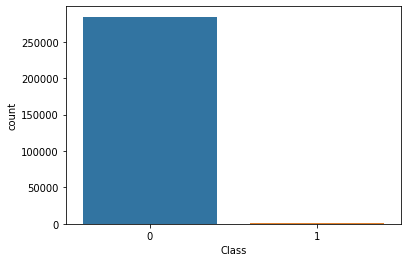

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='Class', data=df)

<AxesSubplot:>

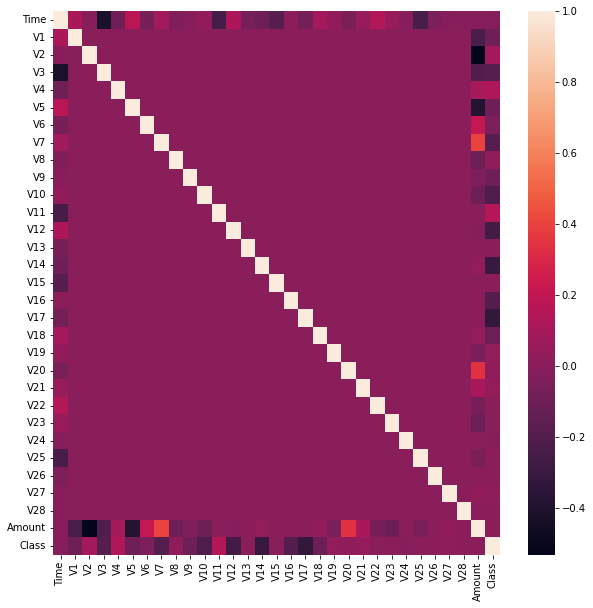

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [40]:
from plotly.offline import iplot
import plotly.figure_factory

class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = plotly.figure_factory.create_distplot([df.loc[df['Class'] == 0]['Time'], df.loc[df['Class'] == 1]['Time']], 
                                            ['Not Fraud', 'Fraud'], 
                                            show_hist=False, 
                                            show_rug=False)
iplot(fig)

- Fraudulent transactions are more evenly distributed across the two days
- Between the two troughs of non-fraudulent transactions ~85k seconds is close to 1 day
- Troughs perhaps indicate late night or early morning when there are less frequent non-fraudulent transactions taking place
- Explore time more
- Create more features

In [41]:
df['Hours'] = df['Time'] / 3600
tmp = df.groupby(['Hours', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
tmp = pd.DataFrame(tmp)

Sum of transactions vs Hours

<AxesSubplot:xlabel='Hours', ylabel='sum'>

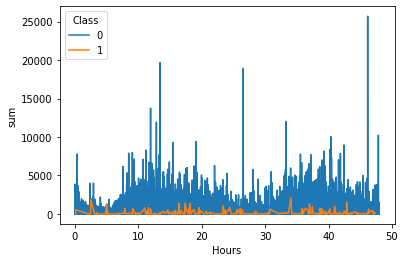

In [42]:
sns.lineplot(x='Hours', y='sum', hue='Class', data=tmp)

Total transactions

<AxesSubplot:xlabel='Hours', ylabel='count'>

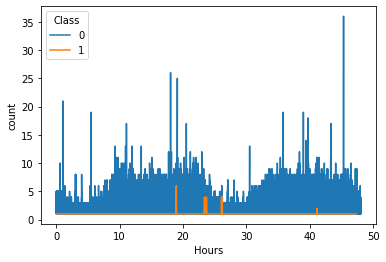

In [43]:
sns.lineplot(x='Hours', y='count', hue='Class', data=tmp)

Max transaction amount

<AxesSubplot:xlabel='Hours', ylabel='max'>

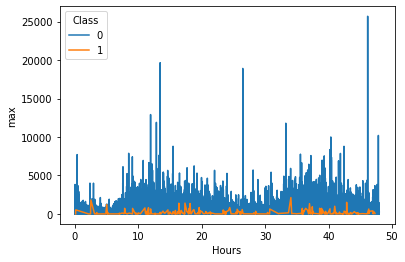

In [44]:
sns.lineplot(x='Hours', y='max', hue='Class', data=tmp)

Average transaction amount

<AxesSubplot:xlabel='Hours', ylabel='mean'>

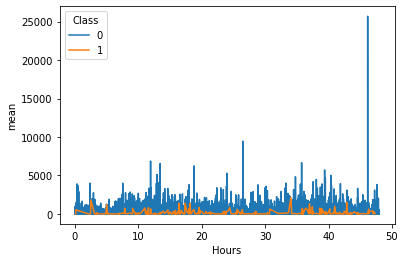

In [45]:
sns.lineplot(x='Hours', y='mean', hue='Class', data=tmp)

- Count is most important 
- Most fraudulent transactions take place during the night if the scale represents 0 hours as midnight

<AxesSubplot:xlabel='Hours', ylabel='count'>

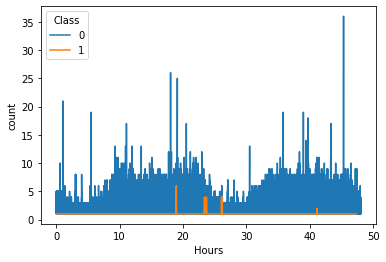

In [46]:
sns.lineplot(x='Hours', y='count', hue='Class', data=tmp)

Distribution of fradulent and non-fraudulent

In [47]:
non_fraud = tmp[tmp.Class==0]
fraud = tmp[tmp.Class==1]

In [48]:
non_fraud.describe()

,Hours,Class,min,max,count,sum,mean,median,var
count,124479.000000,124479.0,124479.000000,124479.000000,124479.00000,124479.000000,124479.000000,124479.000000,7.927900e+04
mean,25.666554,0.0,39.433507,162.063157,2.28404,201.660216,86.826497,70.315927,6.334237e+04
std,13.523983,0.0,153.374754,358.297809,1.38826,401.160493,193.217749,180.619639,9.940134e+05
min,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00
25%,14.214861,0.0,1.780000,16.490000,1.00000,20.000000,12.350000,9.950000,2.259109e+02
50%,23.923056,0.0,8.590000,59.950000,2.00000,78.700000,37.410000,26.710000,1.854405e+03
75%,38.066806,0.0,27.395000,163.895000,3.00000,220.745000,91.147500,69.125000,1.193673e+04
max,47.997778,0.0,25691.160000,25691.160000,36.00000,25691.160000,25691.160000,25691.160000,1.787753e+08


In [49]:
fraud.describe()

,Hours,Class,min,max,count,sum,mean,median,var
count,468.000000,468.0,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,8.000000
mean,22.318383,1.0,122.259850,124.867906,1.051282,128.478568,123.563878,123.563878,17397.735137
std,13.578639,0.0,260.738542,261.402786,0.410695,266.603129,260.645699,260.645699,30009.993701
min,0.112778,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.441875,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,19.911111,1.0,9.170000,9.555000,1.000000,9.555000,9.555000,9.555000,2941.551467
75%,35.887500,1.0,104.202500,106.130000,1.000000,106.637500,106.130000,106.130000,22119.443733
max,47.318889,1.0,2125.870000,2125.870000,6.000000,2125.870000,2125.870000,2125.870000,87466.687500


<AxesSubplot:xlabel='Class', ylabel='Amount'>

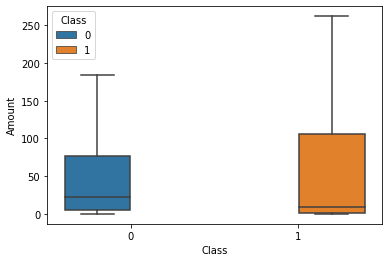

In [50]:
sns.boxplot(x='Class', y='Amount', hue='Class', data=df, showfliers=False)

Feature density plot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



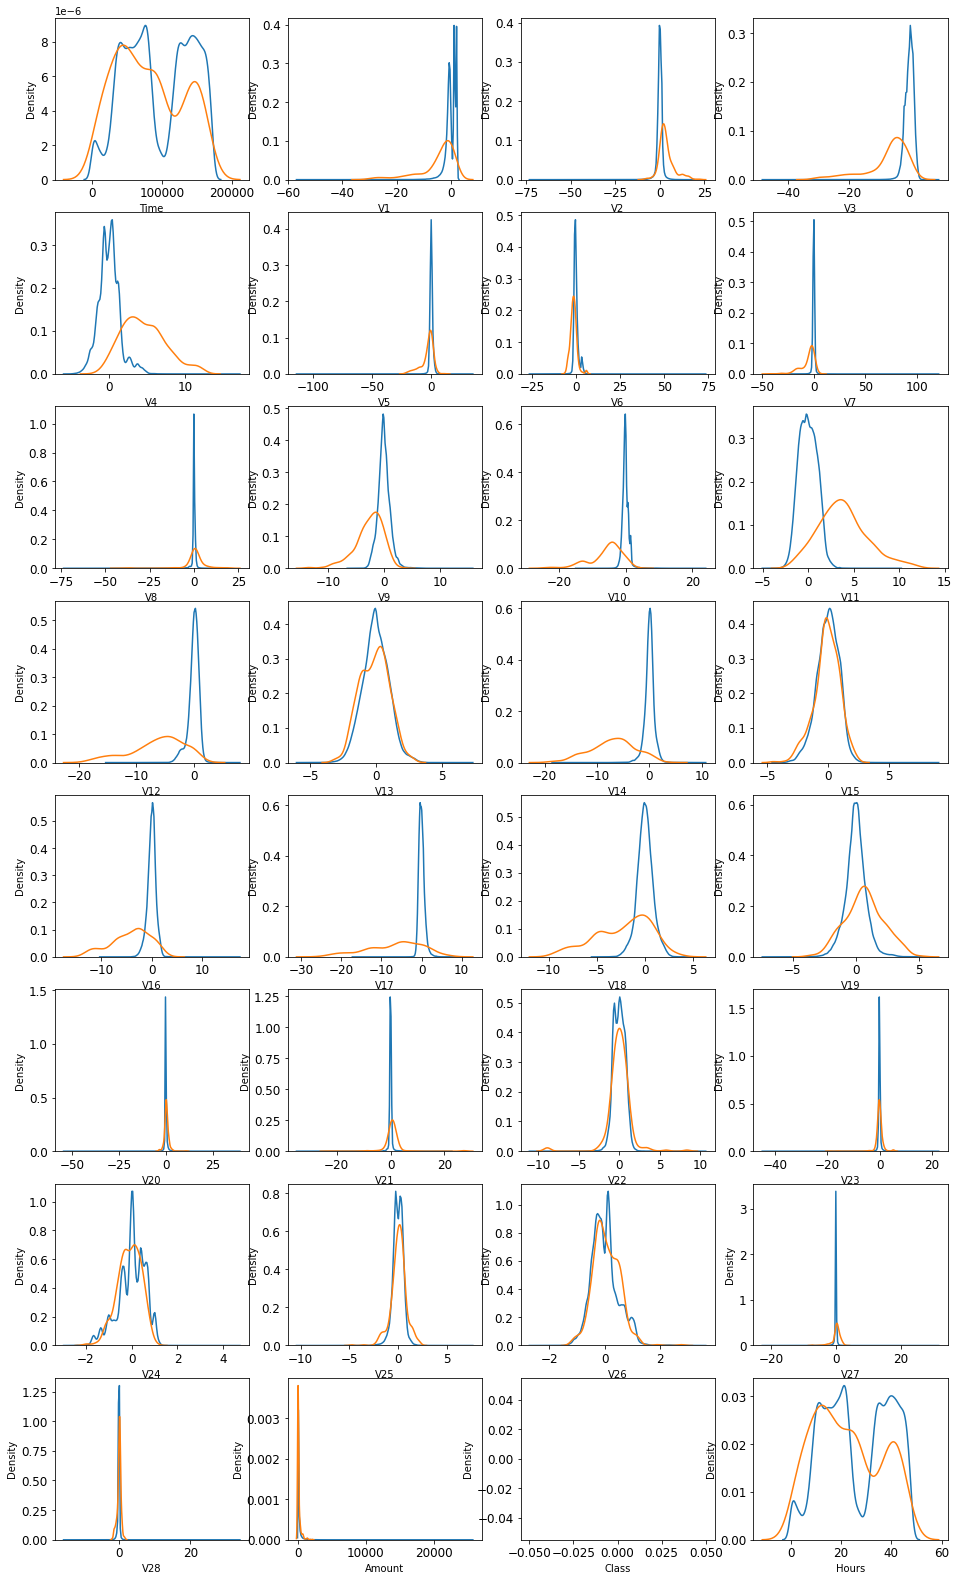

In [51]:
non_fraud = df[df.Class==0]
fraud = df[df.Class==1]

fig, ax = plt.subplots(8,4,figsize=(16,28))

i = 0
for feature in df.columns.values:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(non_fraud[feature], label='0')
    sns.kdeplot(fraud[feature], label='1')
    plt.xlabel(feature)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

- Observe the differences between the distributions of legit vs fraud transactions for each of the features
- Majority have similar features but distinctions can be made in V4, V11, V12, V14, and V18
- Most legit transactions are centered around zero, fraud transactions are skewed

Build classifier that classifies everything as non-fraud

In [52]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [54]:
from sklearn.base import BaseEstimator
import numpy as np

class notFraud(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [55]:
notFraud_clf = notFraud()

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(notFraud_clf, X_train, y_train, scoring='accuracy')

array([0.99848024, 0.99834923, 0.99827062, 0.998061  , 0.99811341])

- Classify everything as not fraud, model gives over 99% accuracy
- Need new metric

- Build `RandomForestClassifier`
- Gini validation criteria
- Receiver Operating Characteristic - Area Under Curve (ROC-AUC)
- 100 estimators
- 4 parallel jobs

In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=4,
                              criterion='gini',
                              n_estimators=100)

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4)

In [59]:
feature_names = list(X_train.columns)
importances = model.feature_importances_

In [60]:
model_importances = pd.Series(importances, index=feature_names)

In [61]:
model_importances.sort_values(ascending=False)

V12       0.157354
V17       0.152161
V14       0.119530
V16       0.083341
V11       0.067890
V10       0.051356
V4        0.039388
V9        0.028913
V7        0.027618
V18       0.025872
V1        0.018573
V26       0.016836
V2        0.016822
V21       0.016001
V3        0.013990
V19       0.012908
V8        0.012578
V5        0.012023
V27       0.011712
Hours     0.011037
V20       0.010685
V22       0.010495
V15       0.010318
Time      0.010257
Amount    0.010054
V28       0.010046
V24       0.009684
V13       0.009477
V6        0.009124
V25       0.007343
V23       0.006613
dtype: float64

In [62]:
preds = model.predict(X_test)

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.9056177461609802

- Build `AdaBoostClassifier`
- `SAMME.R` algorithm
- lr = `0.8`

In [64]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(algorithm='SAMME.R',
                          learning_rate=0.8,
                          n_estimators=100)

In [65]:
def fit():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(roc_auc_score(y_test, preds))

fit()

0.8740806139857676


- Build `CatBoostClassifier`
- `CatBoostClassifier` is a gradient boosting for decision trees algorithm and supports categorical data
- `iterations=500`
- `depth=12`
- lr = `0.02`
- `bagging_temperature = 0.2`

In [66]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period=100,
                             od_wait=100)

In [67]:
fit()

0:	total: 470ms	remaining: 3m 54s
100:	total: 38s	remaining: 2m 29s
200:	total: 1m 14s	remaining: 1m 50s
300:	total: 1m 49s	remaining: 1m 12s
400:	total: 2m 25s	remaining: 36s
499:	total: 3m 1s	remaining: 0us
0.9087890447474745


- Build `xgboost` classifier
- Early stopping

In [68]:
import xgboost
model = xgboost.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1)
model.fit(X_train, 
          y_train, 
          eval_set=[(X_train, y_train), (X_test, y_test)], 
          early_stopping_rounds=2)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-logloss:0.59830	validation_1-logloss:0.59833
[1]	validation_0-logloss:0.52063	validation_1-logloss:0.52067
[2]	validation_0-logloss:0.45585	validation_1-logloss:0.45591
[3]	validation_0-logloss:0.40110	validation_1-logloss:0.40117
[4]	validation_0-logloss:0.35433	validation_1-logloss:0.35441
[5]	validation_0-logloss:0.31403	validation_1-logloss:0.31412
[6]	validation_0-logloss:0.27908	validation_1-logloss:0.27917
[7]	validation_0-logloss:0.24861	validation_1-logloss:0.24870
[8]	validation_0-logloss:0.22190	validation_1-logloss:0.22200
[9]	validation_0-logloss:0.19840	validation_1-logloss:0.19851
[10]	validation_0-logloss:0.17766	validation_1-logloss:0.17777
[11]	validation_0-logloss:0.15931	validation_1-logloss:0.15943
[12]	validation_0-logloss:0.14302	validation_1-logloss:0.14314
[13]	validation_0-logloss:0.12853	validation_1-logloss:0.12865
[14]	validation_0-logloss:0.11562	validation_1-logloss:0.11575
[15]	validation_0-logloss:0.10410	validation_1-logloss:0.10423
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [69]:
preds = model.predict(X_test)
roc_auc_score(y_test, preds)

0.905623075060669

Build `xgboost` with parameter grid instead

In [70]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.039,
    'silent': True,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'auc'
}

In [71]:
dtrain = xgboost.DMatrix(X_train, y_train)

In [72]:
model = xgboost.train(params=params,
                     dtrain=dtrain,
                     num_boost_round=1000,
                     evals=[(dtrain, 'train')],
                     early_stopping_rounds=100,
                     verbose_eval=100)

[15:36:06] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.90979
[100]	train-auc:0.97268
[200]	train-auc:0.99985
[300]	train-auc:1.00000
[400]	train-auc:1.00000
[472]	train-auc:1.00000


In [73]:
preds = model.predict(xgboost.DMatrix(X_test, y_test))

In [74]:
roc_auc_score(y_test, preds)

0.9820131872504299

- Model had an `roc_auc_score` of 1
- On fresh data `roc_auc_score` is equal to 0.98

- `LGBMClassifier` - another gradient boosting algorithm
- Input model parameters

In [75]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric':'auc',
    'learning_rate': 0.05,
    'num_leaves': 7,  
    'max_depth': 4, 
    'min_child_samples': 100,  
    'max_bin': 100,  
    'subsample': 0.9,  
    'subsample_freq': 1,  
    'colsample_bytree': 0.7,  
    'min_child_weight': 0,  
    'min_split_gain': 0, 
    'nthread': 8,
    'verbose': 0,
    'scale_pos_weight':150, # training data is very unbalanced
}

In [84]:
import lightgbm
dtrain = lightgbm.Dataset(X_train, y_train)

evals_results = {}

model = lightgbm.train(params=params,
                       train_set=dtrain,
                       valid_sets=[dtrain],
                       evals_result=evals_results,
                       num_boost_round=1000,
                       early_stopping_rounds=50,
                       verbose_eval=100,
                       feval=None)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050061 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.997978
[200]	training's auc: 0.998379
[300]	training's auc: 0.995628
[400]	training's auc: 0.995555
[500]	training's auc: 0.98741
[600]	training's auc: 0.831148
[700]	training's auc: 0.926241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positi

- Best AUC = `0.999181`

<AxesSubplot:title={'center':'Features importance (LightGBM)'}, xlabel='Feature importance', ylabel='Features'>

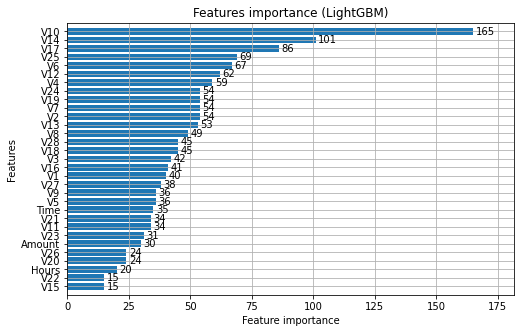

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
lightgbm.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax) 

In [87]:
preds = model.predict(X_test)
roc_auc_score(y_test, preds)

0.8915305149553727

- Demonstrated that `cross_val_score` is not a good metric for classifiers
- Implemented classifier that classifies everything as not fraud, that achieved 99% accuracy
- Needed to new metric
- `roc_auc_score` used
- `xgboost` had the best `roc_auc_score` with `1.00` on the training set (validation) and `0.98` on new data (test set)
- `roc_auc_score` discussed further below

### ROC Curve
- The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers
- Instead of plotting precision against recall, ROC curve plots true positive rate (i.e. recall) against false positive rate
- The ROC curve plots sensitivity (i.e. recall) against 1-specificity
- Plot the ROC curve

- More information can be seen in this [Notebook](https://github.com/jagjeevan96/jagjeevan96.github.io/blob/main/notebooks/mnist.ipynb)